<a href="https://colab.research.google.com/github/TheAmirHK/Genetic_Algorithm_Parallelization/blob/main/Genetic_Algorithm(Mixed_Int).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# In[Parameters]
POPULATION_SIZE = 1000  # Number of individuals in the population
GENERATIONS = 1500  # Number of generations
MUTATION_RATE = 0.1  # Mutation rate
CROSSOVER_RATE = 0.8  # Crossover rate
ELITISM = 3  # Number of best individuals to carry over to the next generation

In [117]:
# In[Define optimization problem]
# minimize x1**2 + 2*x2**2 - 4*x3**2 + 11*x4**3
# s.t. x1 + x2 <= 5  and   x3^2 + x4^2 - x2*x1*x3 <= 20 and x1, x2, x3, x4 in [1, 10]
# also, x1,x2 are integer variables and x3,x4 are continues.

INTEGER_INDICES = [0, 1]
CONTINUOUS_INDICES = [2, 3]
BOUNDS = [(1, 10)]*4

def objective_function(individual):
    x1, x2, x3, x4 = individual
    return x1**2 + 2*x2**3 - 4*x3**2 + 11*x4**3

def constraint1(individual):
    x1, x2, _, _ = individual
    return x1 + x2 - 5

def constraint2(individual):
    x1, x2, x3, x4 = individual
    return (x3**2 + x4**2 - x2*x1*x3)-20

def penalty_function(individual):
    penalty = 0
    if constraint1(individual) > 0:
        penalty += 10000 * abs(constraint1(individual))
    if constraint2(individual) > 0:
        penalty += 10000 * abs(constraint2(individual))
    return penalty

def fitness_function(individual):
    return objective_function(individual) + penalty_function(individual)

In [118]:
# In[random population]
def create_individual():
    return [
        random.randint(*BOUNDS[i]) if i in INTEGER_INDICES else random.uniform(*BOUNDS[i])
        for i in range(4)
    ]

def create_population(size):
    return [create_individual() for _ in range(size)]

In [119]:
# In[selection]
def selection(population, k=3):
    tournament = random.sample(population, k)
    return min(tournament, key=fitness_function)

In [120]:
# In[crossover (single-point crossover)]
def crossover(parent1, parent2):
    if random.random() < CROSSOVER_RATE:
        point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]

        # Ensure integer values remain integers
        for i in INTEGER_INDICES:
            child1[i] = int(round(child1[i]))
            child2[i] = int(round(child2[i]))

        return child1, child2
    return parent1, parent2

In [121]:
# In[mutation within [1, 10]]
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            if i in INTEGER_INDICES:
                individual[i] = random.randint(*BOUNDS[i])  # Integer mutation
            else:
                individual[i] += random.uniform(-0.5, 0.5)  # Small perturbation for continuous values
                individual[i] = max(BOUNDS[i][0], min(BOUNDS[i][1], individual[i]))  # Keep in bounds
    return individual

In [122]:
# In[Evolve the population]
def evolve_population(population):
    new_population = []

    # elitism action
    elites = sorted(population, key=fitness_function)[:ELITISM]
    new_population.extend(elites)

    # put rest of the population with offspring
    while len(new_population) < POPULATION_SIZE:
        parent1 = selection(population)
        parent2 = selection(population)
        child1, child2 = crossover(parent1, parent2)
        new_population.append(mutate(child1))
        new_population.append(mutate(child2))

    return new_population[:POPULATION_SIZE]

In [123]:

# In[GA]
def genetic_algorithm():
    population = create_population(POPULATION_SIZE)
    best_fitness_history = []

    for generation in tqdm(range(GENERATIONS)):
        population = evolve_population(population)
        best_individual = min(population, key=fitness_function)
        best_fitness = fitness_function(best_individual)
        best_fitness_history.append(best_fitness)

    best_individual = min(population, key=fitness_function)

    plt.plot(best_fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Evolution of Best Fitness over Generations")
    plt.grid(True)
    plt.show()

    return best_individual, fitness_function(best_individual)

100%|██████████| 1500/1500 [00:16<00:00, 90.97it/s] 


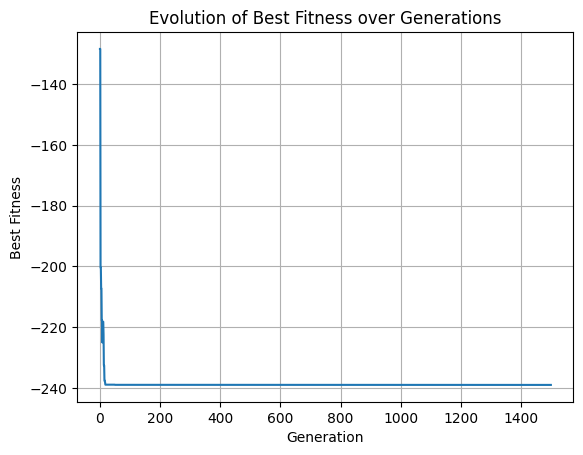


Optimal Solution: [3, 2, 8.291490859818687, 1]
Minimum Objective Value: -238.9952827138273


In [124]:
if __name__ == "__main__":
    best_solution, best_fitness = genetic_algorithm()
    print(f"\nOptimal Solution: {best_solution}")
    print(f"Minimum Objective Value: {best_fitness}")